In [37]:
import pickle
import pandas as pd
import sys
from pathlib import Path
sys.path.append("/users/tom/git/neon_blink_detection/")
sys.path.append("/users/tom/git/neon_blink_detection/src")
from training.helper import get_augmentation_options

aug_options = get_augmentation_options()
clf_path = Path("/users/tom/git/neon_blink_detection/training-XGBClassifier-3-070320231826")

options 100


In [41]:
import numpy as np

trans_values = list(np.arange(0, 15, 0.25))

f1_val = np.zeros(len(trans_values))
f1_test = np.zeros(len(trans_values))
f1_train = np.zeros(len(trans_values))

recall_val = np.zeros(len(trans_values))
recall_test = np.zeros(len(trans_values))
recall_train = np.zeros(len(trans_values))

precision_val = np.zeros(len(trans_values))
precision_test = np.zeros(len(trans_values))
precision_train = np.zeros(len(trans_values))

file_pattern = "n_lay7-lay_intv7-grid4-win11-trans*-scale0.0"
    
for idx in range(len(trans_values)):

    exp_name = file_pattern.replace('*', str(trans_values[idx]))

    fn = clf_path / exp_name / "results.pkl" 

    results = pickle.load(open(fn, "rb"))

    f1_train[idx] = results.metrics_pp_train.F1
    f1_val[idx] = results.metrics_pp_val.F1
    f1_test[idx] = results.metrics_pp_test.F1

    recall_val[idx] = results.metrics_pp_val.recall
    recall_test[idx] = results.metrics_pp_test.recall
    recall_train[idx] = results.metrics_pp_train.recall

    precision_val[idx] = results.metrics_pp_val.precision
    precision_test[idx] = results.metrics_pp_test.precision
    precision_train[idx] = results.metrics_pp_train.precision
    

In [ ]:
results.

Text(0.5, 0, 'Translation [px]')

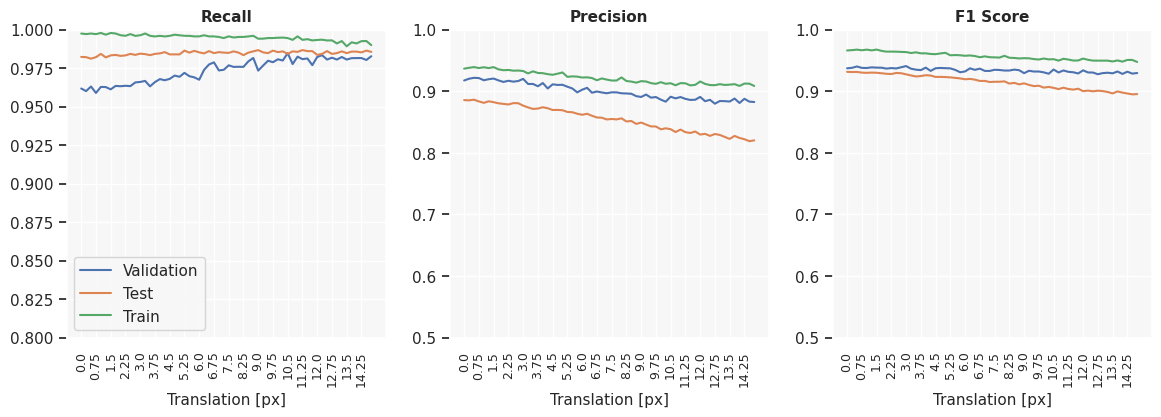

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style(rc = {'axes.facecolor': [0.97, 0.97, 0.97], 'xtick.major.size': 4, 'xtick.bottom': False, 'ytick.left': True})

# ax[0].rcParams['xtick.major.width'] = 1
# ax[0].rcParams['xtick.bottom'] = True
# ax[0].rcParams['ytick.left'] = True


ticks = list(np.arange(0, len(trans_values), 3))
tick_vals = np.array(trans_values)[ticks]

f, ax = plt.subplots(1, 3)
f.set_size_inches(14, 4)

ax[0].plot(recall_val)
ax[0].plot(recall_test)
ax[0].plot(recall_train)
ax[0].set_title("Recall", fontsize=11, fontweight="bold")
ax[0].legend(["Validation", "Test", "Train"], fontsize=11)
ax[0].set_xticks(ticks, tick_vals, rotation=90, fontsize=9)
ax[0].set_xlabel("Translation [px]", fontsize=11)
ax[0].set_ylim(0.8, 1)

ax[1].plot(precision_val)
ax[1].plot(precision_test)
ax[1].plot(precision_train)
ax[1].set_title("Precision", fontsize=11, fontweight="bold")
ax[1].set_xticks(ticks, tick_vals, rotation=90, fontsize=9)
ax[1].set_xlabel("Translation [px]", fontsize=11)
ax[1].set_ylim(0.5, 1)

ax[2].plot(f1_val)
ax[2].plot(f1_test)
ax[2].plot(f1_train)
ax[2].set_xticks(ticks, tick_vals, rotation=90, fontsize=9)
ax[2].set_ylim(0.5, 1)

ax[2].set_title("F1 Score", fontsize=11, fontweight="bold")
ax[2].set_xlabel("Translation [px]", fontsize=11)


In [34]:
import numpy as np

clf_path = Path("/users/tom/git/neon_blink_detection/training-XGBClassifier-3-080320231036")


f1_val = np.zeros(len(aug_options))
f1_test = np.zeros(len(aug_options))
f1_train = np.zeros(len(aug_options))

recall_val = np.zeros(len(aug_options))
recall_test = np.zeros(len(aug_options))
recall_train = np.zeros(len(aug_options))

precision_val = np.zeros(len(aug_options))
precision_test = np.zeros(len(aug_options))
precision_train = np.zeros(len(aug_options))

trans_values = [aug_options[x].std_scale for x in range(len(aug_options))]
file_pattern = "n_lay7-lay_intv7-grid4-win11-trans0.0-scale*"
    
for idx in range(len(trans_values)):

    exp_name = file_pattern.replace('*', str(trans_values[idx]))

    fn = clf_path / exp_name / "results.pkl" 

    results = pickle.load(open(fn, "rb"))

    f1_train[idx] = results.metrics_pp_train.F1
    f1_val[idx] = results.metrics_pp_val.F1
    f1_test[idx] = results.metrics_pp_test.F1

    recall_val[idx] = results.metrics_pp_val.recall
    recall_test[idx] = results.metrics_pp_test.recall
    recall_train[idx] = results.metrics_pp_train.recall

    precision_val[idx] = results.metrics_pp_val.precision
    precision_test[idx] = results.metrics_pp_test.precision
    precision_train[idx] = results.metrics_pp_train.precision
    

FileNotFoundError: [Errno 2] No such file or directory: '/users/tom/git/neon_blink_detection/training-XGBClassifier-3-080320231036/n_lay7-lay_intv7-grid4-win11-trans0.0-scale0.0/results.pkl'

Text(0.5, 0, 'Scaling')

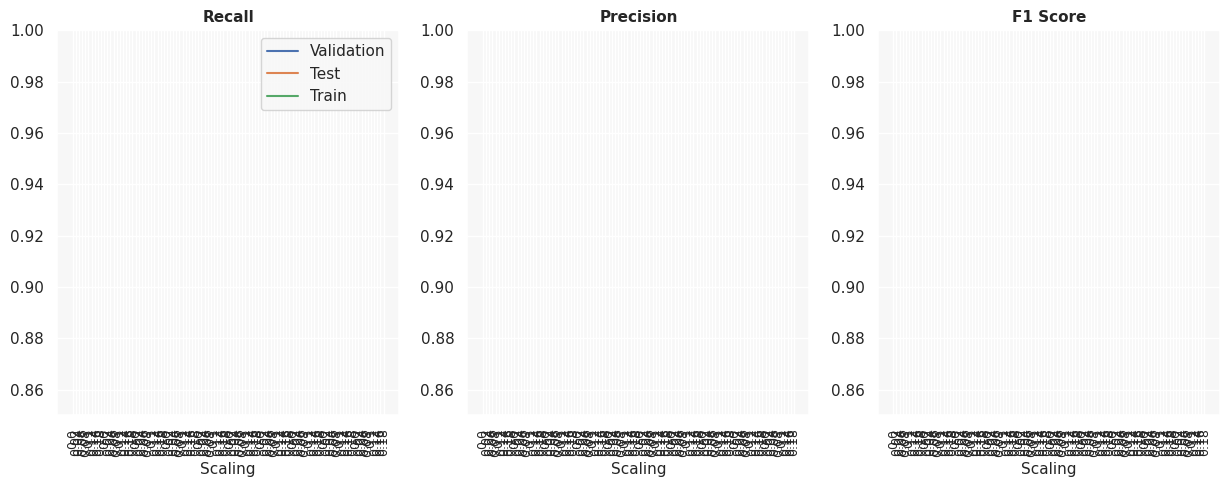

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style(rc = {'axes.facecolor': [0.97, 0.97, 0.97]})

trans_values = np.array(trans_values)
ticks = list(np.arange(0, len(trans_values), 1))
tick_vals = trans_values[ticks]

f, ax = plt.subplots(1, 3)
f.set_size_inches(15, 5)

ax[0].plot(recall_val)
ax[0].plot(recall_test)
ax[0].plot(recall_train)
ax[0].set_title("Recall", fontsize=11, fontweight="bold")
ax[0].legend(["Validation", "Test", "Train"], fontsize=11)
ax[0].set_xticks(ticks, tick_vals, rotation=90, fontsize=9)
ax[0].set_xlabel("Scaling", fontsize=11)
ax[0].set_ylim(0.85, 1)

ax[1].plot(precision_val)
ax[1].plot(precision_test)
ax[1].plot(precision_train)
ax[1].set_title("Precision", fontsize=11, fontweight="bold")
ax[1].set_xticks(ticks, tick_vals, rotation=90, fontsize=9)
ax[1].set_xlabel("Scaling", fontsize=11)
ax[1].set_ylim(0.85, 1)

ax[2].plot(f1_val)
ax[2].plot(f1_test)
ax[2].plot(f1_train)
ax[2].set_xticks(ticks, tick_vals, rotation=90, fontsize=9)
ax[2].set_ylim(0.85, 1)

ax[2].set_title("F1 Score", fontsize=11, fontweight="bold")
ax[2].set_xlabel("Scaling", fontsize=11)
